In [1]:
from joblib import load
import pandas as pd
from sklearn.model_selection import GridSearchCV, GroupKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
grid = load('../models/rf_gridsearch_CV_ach-at_6000_3_3_.joblib')

In [4]:
results = pd.DataFrame(grid.cv_results_)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_Accuracy,split1_test_Accuracy,split2_test_Accuracy,...,split4_test_F1-score,split5_test_F1-score,split6_test_F1-score,split7_test_F1-score,split8_test_F1-score,split9_test_F1-score,split10_test_F1-score,mean_test_F1-score,std_test_F1-score,rank_test_F1-score
0,1.152052,0.031686,0.018721,0.000675,10,50,"{'max_depth': 10, 'n_estimators': 50}",0.688889,0.333333,0.477778,...,0.409699,0.846547,0.756944,0.478947,0.883301,0.576380,0.889489,0.602846,0.219809,11
1,2.281453,0.065114,0.027038,0.000639,10,100,"{'max_depth': 10, 'n_estimators': 100}",0.688889,0.344444,0.688889,...,0.406941,0.846547,0.772661,0.396173,0.831650,0.601140,0.933333,0.623635,0.215661,2
2,5.636386,0.149210,0.052908,0.001254,10,250,"{'max_depth': 10, 'n_estimators': 250}",0.711111,0.333333,0.577778,...,0.437314,0.846547,0.753231,0.382444,0.832589,0.435737,0.949986,0.600299,0.226452,12
3,11.256132,0.275307,0.094675,0.001950,10,500,"{'max_depth': 10, 'n_estimators': 500}",0.711111,0.344444,0.622222,...,0.460492,0.846547,0.794286,0.355604,0.849624,0.466484,0.933259,0.610981,0.223476,5
4,16.858755,0.456778,0.137488,0.002945,10,750,"{'max_depth': 10, 'n_estimators': 750}",0.700000,0.333333,0.633333,...,0.465072,0.846547,0.753231,0.416667,0.848951,0.403409,0.933259,0.606707,0.222657,9


In [5]:
top10 = results.sort_values('rank_test_F1-score', ascending=True)
top10

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_Accuracy,split1_test_Accuracy,split2_test_Accuracy,...,split4_test_F1-score,split5_test_F1-score,split6_test_F1-score,split7_test_F1-score,split8_test_F1-score,split9_test_F1-score,split10_test_F1-score,mean_test_F1-score,std_test_F1-score,rank_test_F1-score
7,2.308691,0.079053,0.024915,0.000351,None,100,"{'max_depth': None, 'n_estimators': 100}",0.700000,0.355556,0.611111,...,0.468368,0.846547,0.830317,0.369467,0.849624,0.576380,0.933259,0.623924,0.216120,1
1,2.281453,0.065114,0.027038,0.000639,10,100,"{'max_depth': 10, 'n_estimators': 100}",0.688889,0.344444,0.688889,...,0.406941,0.846547,0.772661,0.396173,0.831650,0.601140,0.933333,0.623635,0.215661,2
6,1.164228,0.039921,0.016609,0.000307,None,50,"{'max_depth': None, 'n_estimators': 50}",0.677778,0.377778,0.600000,...,0.434851,0.828571,0.756944,0.392157,0.780344,0.733333,0.866071,0.619025,0.188790,3
9,11.492339,0.304958,0.092932,0.002459,None,500,"{'max_depth': None, 'n_estimators': 500}",0.688889,0.344444,0.588889,...,0.445179,0.846547,0.812447,0.412602,0.866071,0.466484,0.933259,0.613144,0.221668,4
3,11.256132,0.275307,0.094675,0.001950,10,500,"{'max_depth': 10, 'n_estimators': 500}",0.711111,0.344444,0.622222,...,0.460492,0.846547,0.794286,0.355604,0.849624,0.466484,0.933259,0.610981,0.223476,5
8,5.758018,0.170571,0.051870,0.002063,None,250,"{'max_depth': None, 'n_estimators': 250}",0.644444,0.344444,0.644444,...,0.465072,0.864253,0.810290,0.329412,0.848951,0.466484,0.949986,0.610472,0.229848,6
10,17.191718,0.455662,0.135325,0.002277,None,750,"{'max_depth': None, 'n_estimators': 750}",0.688889,0.344444,0.644444,...,0.447671,0.846547,0.791667,0.386411,0.866518,0.403409,0.933259,0.610099,0.226308,7
5,22.416767,0.567740,0.179685,0.002559,10,1000,"{'max_depth': 10, 'n_estimators': 1000}",0.700000,0.333333,0.633333,...,0.474671,0.846547,0.753231,0.382444,0.848951,0.435737,0.933259,0.607407,0.222544,8
4,16.858755,0.456778,0.137488,0.002945,10,750,"{'max_depth': 10, 'n_estimators': 750}",0.700000,0.333333,0.633333,...,0.465072,0.846547,0.753231,0.416667,0.848951,0.403409,0.933259,0.606707,0.222657,9
11,19.946790,2.287078,0.115126,0.021402,None,1000,"{'max_depth': None, 'n_estimators': 1000}",0.677778,0.333333,0.655556,...,0.440000,0.846547,0.791667,0.317647,0.866518,0.435737,0.933259,0.604158,0.235095,10


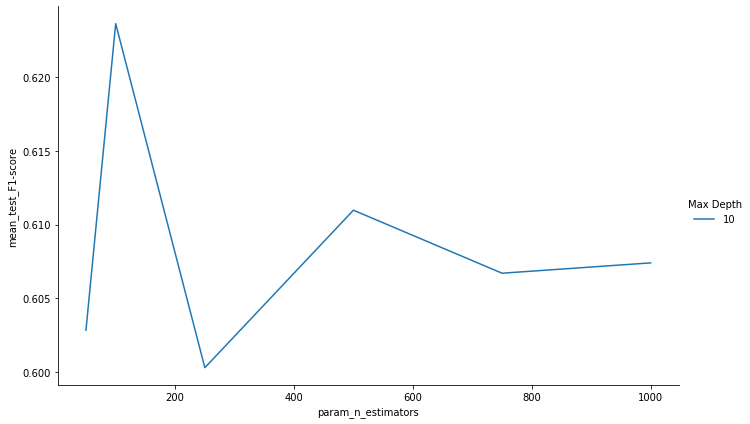

In [6]:
# qt_10 = results[results['param_max_features'] == 'log2']
fg = sns.FacetGrid(data = results, hue='param_max_depth', aspect=1.61, height=6)
fg.map(plt.plot, 'param_n_estimators', 'mean_test_F1-score').add_legend(title='Max Depth')
# fg.set(xlabel='Inverse Regularisation Strength (C)', ylabel='Mean Score', title='Tuning the Logistic Regression Model (n_quantiles = 10)')

# plt.scatter(results['param_n_estimators'], results['mean_test_F1-score'])

In [7]:
model = grid.best_estimator_
score = grid.best_score_
params = grid.best_params_

In [8]:
print(params)
print(score)

{'max_depth': None, 'n_estimators': 100}
0.6239244088617671


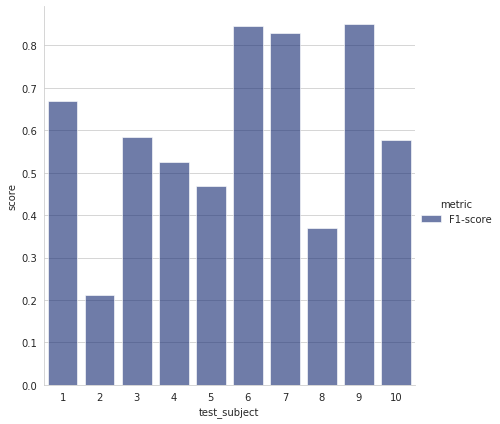

In [9]:
best = pd.DataFrame(results.iloc[grid.best_index_,:])
best = best.T
splits = []
for i in range(0,10):
    split = best[[col for col in best if col.startswith('split'+str(i)+'_test')]]
    split.columns = split.columns.str.lstrip('split'+str(i)+'_test_')
    split.index = [i]
    splits.append(split)

scores = pd.concat(splits)
scores['test_subject'] = scores.index+1
sns.set_style(style="whitegrid")
scores2 = pd.melt(scores, id_vars='test_subject', value_vars=['F1-score'],
var_name='metric',value_name='score')
g = sns.catplot(
    data = scores2, kind = 'bar',
    x = 'test_subject', y='score', hue='metric',
    ci="sd", palette="dark", alpha=.6, height=6
)
plt.show()

In [10]:
# drop subject 2, 8, 5, 4

# look at indices of test set
grid.cv[4][1]

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89])

In [11]:
X = pd.read_hdf('../data/features/filtered/ach-at_6000_eff_3_3_filtered.h5')
y = pd.read_hdf('../data/processed/y_3_class_6000_AT.h5')
sub = pd.read_hdf('../data/processed/subject_6000_AT.h5')


In [16]:
sub_new = sub[(sub != '05_0316_ach-at') & (sub != '05_0201_ach-hex') & (sub != '00_0315_ach-at') & (sub != '04_0316_ach-at')]
clean = sub[(sub != '05_0316_ach-at') & (sub != '05_0201_ach-hex') & (sub != '00_0315_ach-at') & (sub != '04_0316_ach-at')].index
y = y.reset_index(drop=True)

drop = ['05_0316_ach-at', '05_0201_ach-hex', '00_0315_ach-at', '04_0316_ach-at']
sub[-sub.isin(drop)]

90     01_0126_ach-hex
91     01_0126_ach-hex
92     01_0126_ach-hex
93     01_0126_ach-hex
94     01_0126_ach-hex
            ...       
805    08_0201_ach-hex
806    08_0201_ach-hex
807    08_0201_ach-hex
808    08_0201_ach-hex
809    08_0201_ach-hex
Name: subject, Length: 480, dtype: object

In [120]:
X_clean = X.iloc[clean,:]
y_clean = y[clean]

In [121]:
gkf = GroupKFold(n_splits = len(sub_new.unique()))
gkf = list(gkf.split(X_clean, y_clean, sub_new))

In [122]:
cross_val_score(model, X_clean, y_clean, cv=gkf, scoring='f1_weighted')

array([0.47653001, 0.55555556, 0.84654731, 0.94998611, 0.84962406,
       0.84654731, 0.6011396 ])

In [118]:
sub_new.unique()

array(['01_0126_ach-hex', '02_0126_ach-hex', '03_0126_ach-hex',
       '06_0201_ach-hex', '08_0201_ach-hex'], dtype=object)

In [135]:
at = sub[sub.str.endswith('hex')]
X_at = X.iloc[at.index,:]
y_at = y[at.index]
gkf = GroupKFold(n_splits = len(at.unique()))
gkf = list(gkf.split(X_at, y_at, at))
cross_val_score(model, X_at, y_at, cv=gkf, scoring='f1_weighted')

array([0.57637997, 0.84654731, 0.33333333, 0.81029031, 0.71291866,
       0.40340909])

The Classifier seems to work well on those subjects where it does not have to predict AT. It seems we can probably predict baseline/ach reliably, baseline/ach/AT seems much harder

In [82]:
X1 = pd.read_hdf('../data/features/ach_6000_filtered.h5')
y1 = pd.read_hdf('../data/features/y_2_class_6000.h5')
y1 = y1.reset_index(drop=True)
X1 = X1.reset_index(drop=True)
sub = pd.read_hdf('../data/features/subject_binary_6000.h5')
sub = sub.reset_index(drop=True)
# # drop subject 4
# sub = sub[sub!='04_0316_ach-at']
# X1 = X1.iloc[sub.index,:]
# y1 = y1.iloc[sub.index]

In [44]:
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier


In [83]:
# clf = LinearSVC()
rf = RandomForestClassifier()
gkf = GroupKFold(n_splits = len(sub.unique()))
gkf = list(gkf.split(X1, y1, sub))
cross_val_score(rf, X1, y1, cv=gkf, scoring='roc_auc')

array([1.        , 1.        , 0.98777778, 0.84611111, 0.80722222,
       0.99833333, 0.92277778, 1.        , 0.96166667, 0.965     ,
       1.        ])

array(['00_0315_ach-at', '01_0126_ach-hex', '02_0126_ach-hex',
       '02_0315_ach-at', '03_0126_ach-hex', '04_0316_ach-at',
       '05_0201_ach-hex', '05_0316_ach-at', '06_0201_ach-hex',
       '06_0317_ach-at', '08_0201_ach-hex'], dtype=object)

In [15]:
rf.fit(X1,y1)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [23]:
importance_index = pd.Series(rf.feature_importances_).sort_values(ascending=False).index

In [25]:
X1.columns[importance_index[:10]]

Index(['2_56_diff__change_quantiles__f_agg_"mean"__isabs_True__qh_0.6__ql_0.4',
       '47_56_diff__ar_coefficient__k_10__coeff_1',
       '3_56_diff__change_quantiles__f_agg_"mean"__isabs_True__qh_0.6__ql_0.2',
       '3_56_diff__change_quantiles__f_agg_"var"__isabs_False__qh_0.6__ql_0.2',
       '2_56_diff__change_quantiles__f_agg_"mean"__isabs_True__qh_0.8__ql_0.0',
       '50_51_diff__ar_coefficient__k_10__coeff_1',
       '11_13_diff__change_quantiles__f_agg_"var"__isabs_False__qh_1.0__ql_0.4',
       '2_56_diff__agg_linear_trend__f_agg_"min"__chunk_len_5__attr_"stderr"',
       '2_56_diff__change_quantiles__f_agg_"var"__isabs_False__qh_0.4__ql_0.2',
       '3_56_diff__mean_abs_change'],
      dtype='object')

In [48]:
X2 = pd.read_hdf('../data/features/ach-at_binary_6000_combined.h5')
y2 = pd.read_hdf('../data/features/y_2_class_ach-at_6000.h5')
y2 = y2.reset_index(drop=True)
X2 = X2.reset_index(drop=True)
sub = pd.read_hdf('../data/features/subject_binary_ach-at_6000.h5')
sub = sub.reset_index(drop=True)

In [49]:
from tsfresh import select_features

In [50]:
X2_f = select_features(X2, y2, ml_task='classification', n_jobs=8)

In [55]:
X2_f.shape, y2.shape, sub.shape

((480, 8742), (480,), (480,))

In [57]:
X2_f.to_hdf('../data/features/ach-at_binary_6000_eff_filtered.h5', key='data', complevel=9)

In [80]:
rf2 = RandomForestClassifier(n_estimators=500)
gkf = GroupKFold(n_splits = len(sub.unique()))
gkf = list(gkf.split(X2_f, y2, sub))
cross_val_score(rf2, X2_f, y2, cv=gkf, scoring='accuracy')

array([0.4       , 0.5       , 0.81666667, 0.5       , 0.5       ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        ])

In [75]:
y2.value_counts()

1    330
2    150
Name: y, dtype: int64

In [81]:
rf2.fit(X2_f, y2)
importance_index = pd.Series(rf2.feature_importances_).sort_values(ascending=False).index
X2_f.columns[importance_index[:10]]

Index(['42_56_diff__cid_ce__normalize_True',
       '12_13_diff__number_crossing_m__m_0',
       '42_56_diff__number_crossing_m__m_1', '16__number_crossing_m__m_-1',
       '37_30_diff__change_quantiles__f_agg_"var"__isabs_False__qh_1.0__ql_0.2',
       '16__number_crossing_m__m_1', '56__cid_ce__normalize_True',
       '42_46_diff__cid_ce__normalize_True', '16__number_crossing_m__m_0',
       '55_51_diff__change_quantiles__f_agg_"var"__isabs_False__qh_0.8__ql_0.2'],
      dtype='object')